In [1]:
import pandas as pd
import os

In [ ]:
# View the contents of the directory we need

In [3]:
os.getcwd()

'/home/samgsm/data_analyst/4/miniprojects'

In [6]:
os.listdir('/home/samgsm/data_analyst/4/miniprojects/data/')

['2020-12-06',
 '2020-12-07',
 '2020-12-05',
 '2020-12-03',
 '2020-12-08',
 '2020-12-04',
 '2020-12-09']

In [ ]:
# Create two variables with paths to working directories

In [7]:
path = '/home/samgsm/data_analyst/4/miniprojects/data/'

In [8]:
path_parts = '/home/samgsm/data_analyst/4/miniprojects/data/'

In [41]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Construct full path to file
        data_path = f'{current_path}/{file}'
        
        # Read data
        temp_df = pd.read_csv(data_path)
        
        # Extract date and name
        path_parts = current_path.split('/')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Add date and name columns 
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data into main df
        df = pd.concat((df, temp_df))
        print(df.shape)


(4, 5)
(7, 5)
(9, 5)
(13, 5)
(17, 5)
(19, 5)
(25, 5)
(27, 5)
(28, 5)
(31, 5)
(35, 5)
(40, 5)
(42, 5)
(46, 5)
(49, 5)
(52, 5)
(58, 5)
(60, 5)
(63, 5)
(68, 5)
(70, 5)
(76, 5)
(80, 5)
(86, 5)
(91, 5)
(96, 5)
(102, 5)
(103, 5)
(106, 5)
(108, 5)
(111, 5)
(117, 5)
(123, 5)
(129, 5)
(131, 5)
(136, 5)
(138, 5)
(141, 5)
(144, 5)
(145, 5)
(146, 5)
(151, 5)
(157, 5)
(161, 5)


In [42]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,56,4,2020-12-06,Vasiliy_Fedorov
1,1,97,3,2020-12-06,Vasiliy_Fedorov
2,2,79,3,2020-12-06,Vasiliy_Fedorov
3,3,29,5,2020-12-06,Vasiliy_Fedorov
0,0,95,2,2020-12-07,Vasiliy_Ivanov
...,...,...,...,...,...
5,5,90,3,2020-12-09,Anton_Ivanov
0,0,79,3,2020-12-09,Anton_Smirnov
1,1,33,1,2020-12-09,Anton_Smirnov
2,2,81,3,2020-12-09,Anton_Smirnov


In [43]:
# Remove the "Unnamed: 0" column that duplicated the index
df.drop(columns=['Unnamed: 0'], inplace=True)

In [44]:
df

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
...,...,...,...,...
5,90,3,2020-12-09,Anton_Ivanov
0,79,3,2020-12-09,Anton_Smirnov
1,33,1,2020-12-09,Anton_Smirnov
2,81,3,2020-12-09,Anton_Smirnov


In [45]:
# Delete the index
df = df.reset_index(drop=True)

In [48]:
# Find out which user bought the most products
users_quantity = df.groupby('name', as_index=False) \
                .agg({'quantity':'sum'}) \
                .sort_values(['quantity', 'name'], ascending=[False, True])

In [49]:
max_users_quantity = users_quantity[:2].name.tolist()

In [50]:
max_users_quantity

['Alexey_Smirnov', 'Petr_Smirnov']

In [54]:
# Find the top 10 products by units sold all time
top_products = df.groupby('product_id', as_index=False) \
                .agg({'quantity':'sum'}) \
                .sort_values('quantity', ascending=False) \
                .head(10)



In [55]:
top_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

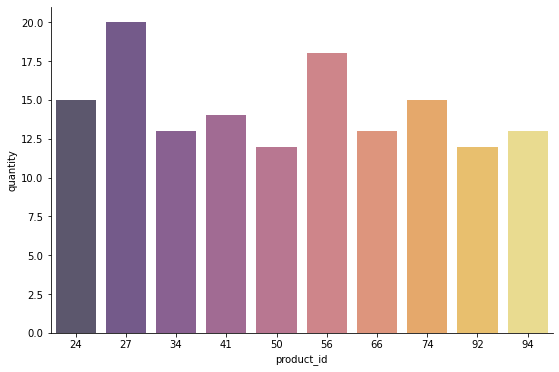

In [67]:
# Based on the results, we will build a barplot
plt.figure(figsize=(9,6))
sns.barplot(data=top_products, 
            x='product_id', 
            y='quantity', 
            palette='inferno',
            alpha = 0.7)
sns.despine()

In [68]:
# Determine the quantity of product sold for 'product_id==56'
top_products.query('product_id == 56')

,product_id,quantity
42,56,18


In [ ]:
# Visualize sales by day

In [69]:
df['date'] = pd.to_datetime(df['date'])

In [71]:
date_sales = df.groupby('date', as_index=False).agg({'quantity':'sum'})

In [72]:
date_sales['date'] = date_sales['date'].dt.day

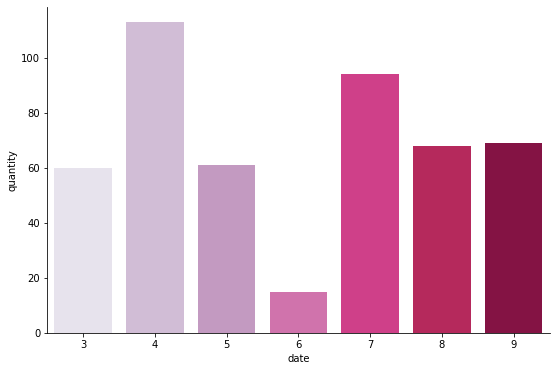

In [80]:
plt.figure(figsize=(9,6))
sns.barplot(data=date_sales, x='date', y='quantity', palette='PuRd')
sns.despine()

In [84]:
# Determine how many users have purchased any product repeatedly (more than 1 time)
df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date':pd.Series.nunique}) \
    .query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
